# CSIS 3290-002_Project
# Surinder Singh Surme (300335547)

### 2. Library import and data prepration

In [83]:
#importing all the important libraries
import pandas as pd
import numpy as np
import seaborn as seab
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

In [84]:
 df=pd.read_csv('dataset/Lab02_prepared.csv')
df.head()

,Unnamed: 0,CourseCategory,Unnamed:3,InstRating,Review,Student,Lectures,Duration,AvgRating,NumberRatings,Enrollment,LastUpdated,Fee,Discount,cbrt_NumberRatings,cbrt_Enrollment,cbrt_Student,cbrt_Review
0,0,business,NaN,4.5,89865.0,405914.0,286.0,9.80,4.6,21837.0,117466.0,3.0,19.99,88.0,27.951020,48.974581,74.041978,44.791629
1,1,programming,NaN,4.2,5658.0,32319.0,66.0,4.97,4.2,1488.0,9068.0,3.0,16.99,88.0,11.416535,20.853094,31.853168,17.819177
2,2,it_software,NaN,4.5,49502.0,376881.0,251.0,93.15,4.4,6864.0,30988.0,5.0,17.99,89.0,19.004616,31.409753,72.232850,36.717597
3,3,it_software,NaN,4.7,14790.0,45655.0,26.0,2.05,4.7,4838.0,15902.0,3.0,16.99,80.0,16.913051,25.146869,35.740678,24.546490
4,4,personal_development,NaN,4.4,15677.0,71088.0,82.0,11.07,4.4,716.0,5774.0,6.0,16.99,83.0,8.946181,17.940130,41.425278,25.027703


In [86]:
df.shape

(1889, 18)

In [87]:
df.dtypes

Unnamed: 0              int64
CourseCategory         object
Unnamed:3             float64
InstRating            float64
Review                float64
Student               float64
Lectures              float64
Duration              float64
AvgRating             float64
NumberRatings         float64
Enrollment            float64
LastUpdated           float64
Fee                   float64
Discount              float64
cbrt_NumberRatings    float64
cbrt_Enrollment       float64
cbrt_Student          float64
cbrt_Review           float64
dtype: object

In [88]:
df.dropna(axis=1,how='any',inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1889 non-null   int64  
 1   CourseCategory      1889 non-null   object 
 2   InstRating          1889 non-null   float64
 3   Student             1889 non-null   float64
 4   Duration            1889 non-null   float64
 5   NumberRatings       1889 non-null   float64
 6   Enrollment          1889 non-null   float64
 7   LastUpdated         1889 non-null   float64
 8   Fee                 1889 non-null   float64
 9   Discount            1889 non-null   float64
 10  cbrt_NumberRatings  1889 non-null   float64
 11  cbrt_Enrollment     1889 non-null   float64
 12  cbrt_Student        1889 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 192.0+ KB


### 3. Exploratory Data Analysis

### a. Print out the summary statistics of the dataset 

In [90]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.describe()

,InstRating,Student,Duration,NumberRatings,Enrollment,LastUpdated,Fee,Discount,cbrt_NumberRatings,cbrt_Enrollment,cbrt_Student
count,1889.000000,1.889000e+03,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000
mean,4.430334,2.122974e+05,11.782605,3616.598200,20035.923240,3.758602,22.505267,78.586554,12.615204,22.861813,46.198698
std,0.188369,3.594932e+05,13.077027,6632.710084,30760.211009,1.292892,19.628230,16.441507,5.885911,10.080773,26.404482
min,3.800000,5.500000e+01,0.500000,17.000000,36.000000,3.000000,12.570000,30.000000,2.571282,3.301927,3.802952
25%,4.300000,1.666900e+04,4.330000,625.000000,3830.000000,3.000000,16.990000,74.000000,8.549880,15.645865,25.544840
50%,4.500000,6.346200e+04,7.780000,1438.000000,9380.000000,3.000000,17.990000,86.000000,11.287202,21.089565,39.887601
75%,4.600000,2.320790e+05,14.170000,3459.000000,20743.000000,4.000000,21.990000,89.000000,15.123426,27.476233,61.453310
max,4.800000,2.168985e+06,164.000000,61471.000000,214121.000000,12.000000,199.990000,92.000000,39.466029,59.825512,129.445070


In [91]:
df.isnull().sum()

CourseCategory        0
InstRating            0
Student               0
Duration              0
NumberRatings         0
Enrollment            0
LastUpdated           0
Fee                   0
Discount              0
cbrt_NumberRatings    0
cbrt_Enrollment       0
cbrt_Student          0
dtype: int64

### b. Print out the correlation of the features. Plot the heatmap of the correlation.

In [92]:
df.corr()

,InstRating,Student,Duration,NumberRatings,Enrollment,LastUpdated,Fee,Discount,cbrt_NumberRatings,cbrt_Enrollment,cbrt_Student
InstRating,1.000000,0.162878,0.004396,0.241002,0.235027,-0.042774,-0.033564,-0.010058,0.350305,0.341526,0.254336
Student,0.162878,1.000000,0.033892,0.299075,0.404642,-0.015158,-0.024874,-0.022123,0.362795,0.440256,0.892173
Duration,0.004396,0.033892,1.000000,0.030856,0.025717,-0.104344,-0.006004,0.001558,0.022580,0.016261,0.041676
NumberRatings,0.241002,0.299075,0.030856,1.000000,0.897299,-0.015795,-0.008264,0.013976,0.886258,0.785116,0.381979
Enrollment,0.235027,0.404642,0.025717,0.897299,1.000000,0.000650,-0.004590,0.021483,0.853936,0.902370,0.486774
LastUpdated,-0.042774,-0.015158,-0.104344,-0.015795,0.000650,1.000000,0.033348,-0.064423,-0.006474,0.008327,-0.024086
Fee,-0.033564,-0.024874,-0.006004,-0.008264,-0.004590,0.033348,1.000000,0.040300,-0.030327,-0.028757,-0.035274
Discount,-0.010058,-0.022123,0.001558,0.013976,0.021483,-0.064423,0.040300,1.000000,0.009731,0.021678,-0.028261
cbrt_NumberRatings,0.350305,0.362795,0.022580,0.886258,0.853936,-0.006474,-0.030327,0.009731,1.000000,0.922106,0.495459
cbrt_Enrollment,0.341526,0.440256,0.016261,0.785116,0.902370,0.008327,-0.028757,0.021678,0.922106,1.000000,0.586839


<Axes: >

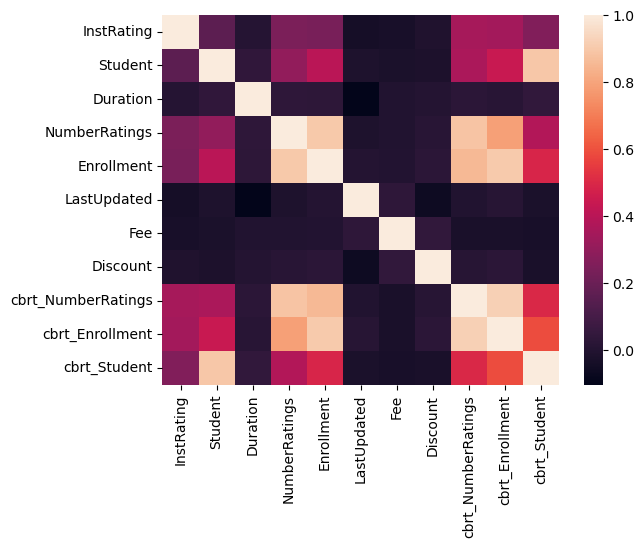

In [93]:
seab.heatmap(df.corr())

### c. Univariate Analysis

<Axes: xlabel='cbrt_NumberRatings', ylabel='Density'>

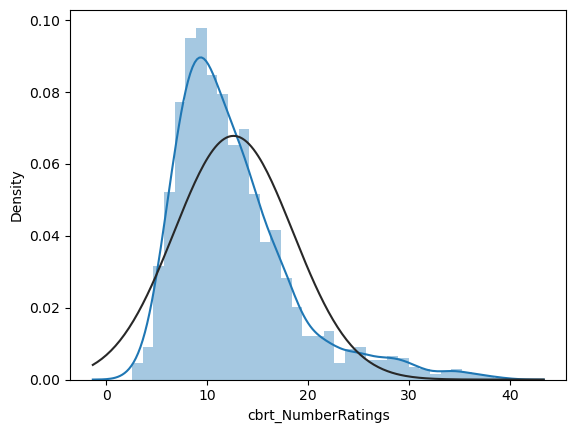

In [94]:
# distribution plot

seab.distplot(df.cbrt_NumberRatings, fit=norm)

#### Most of the Number of  rating are at the range of  0 - 30. Number of ratings where high around 15  and the density value was between 0.08-0.10

Text(0.5, 0, 'cbrt_NumberRatings')

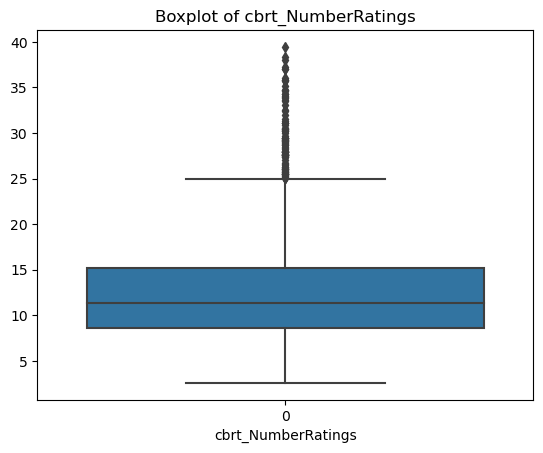

In [95]:
# boxplot
seab.boxplot(df.cbrt_NumberRatings)
plt.title('Boxplot of cbrt_NumberRatings')
plt.xlabel('cbrt_NumberRatings')

#### It can be noted that Number Ratings lies between 7-15

In [96]:
# Find the index of records where cbrt_NumberRatings > 30 and drop them. Plot its distribution again

index =df[df['cbrt_NumberRatings']> 30].index
df.drop(index ,inplace = True)

Text(0.5, 0, 'cbrt_NumberRatings')

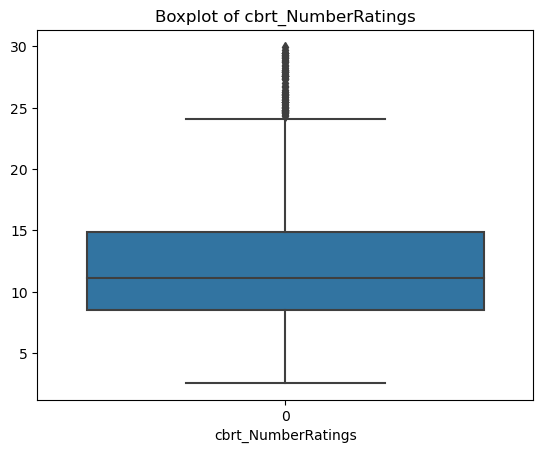

In [97]:
# boxplot
seab.boxplot(df.cbrt_NumberRatings)
plt.title('Boxplot of cbrt_NumberRatings')
plt.xlabel('cbrt_NumberRatings')

### d. Multivariate Analysis

Text(0.5, 1.0, ' cbrt_NumberRatings vs cbrt_Student')

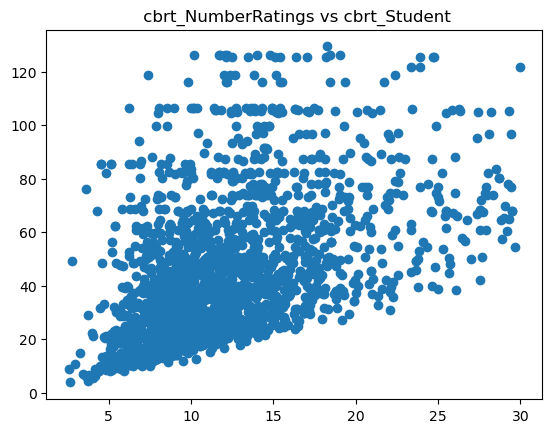

In [98]:
# Scatter plot
plt.scatter(df.cbrt_NumberRatings,df.cbrt_Student)
plt.title(" cbrt_NumberRatings vs cbrt_Student")

Text(0.5, 1.0, ' cbrt_NumberRatings vs cbrt_Enrollment')

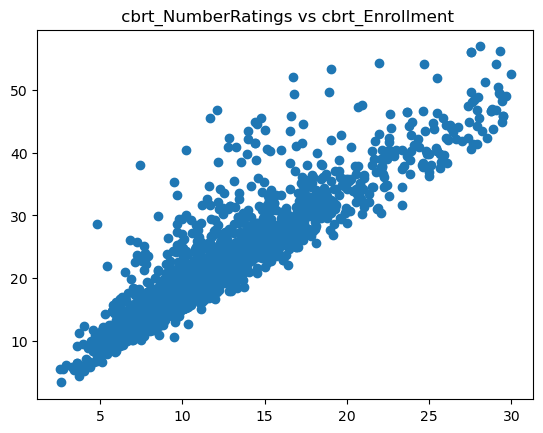

In [99]:
plt.scatter(df.cbrt_NumberRatings,df.cbrt_Enrollment)
plt.title(" cbrt_NumberRatings vs cbrt_Enrollment")

### e.Feature Observation and Hypothesis

#### We generate observations and create hypotheses for the regression model based on the exploratory data analysis. Observations can represent connections between features, prospective outliers, or skewed distributions that could need to be transformed.

### 4. Feature Selection

In [100]:
#a.
df1=df.copy()
target=df.cbrt_NumberRatings
features=df1.drop("cbrt_NumberRatings",axis=1)

In [101]:
# b. Correlation Based Selection (manual or threshold)
df.corr().abs().sort_values("cbrt_NumberRatings",axis=0,ascending=False)

,InstRating,Student,Duration,NumberRatings,Enrollment,LastUpdated,Fee,Discount,cbrt_NumberRatings,cbrt_Enrollment,cbrt_Student
cbrt_NumberRatings,0.340109,0.338432,0.023012,0.910056,0.812101,0.005786,0.039784,0.003657,1.000000,0.907529,0.479470
NumberRatings,0.239651,0.293411,0.033808,1.000000,0.852942,0.017544,0.021870,0.003936,0.910056,0.803768,0.395576
cbrt_Enrollment,0.324782,0.421720,0.016014,0.803768,0.907973,0.008796,0.034599,0.019129,0.907529,1.000000,0.574600
Enrollment,0.210852,0.401503,0.027517,0.852942,1.000000,0.000513,0.008289,0.019027,0.812101,0.907973,0.491663
cbrt_Student,0.240427,0.890229,0.041866,0.395576,0.491663,0.024426,0.038486,0.029014,0.479470,0.574600,1.000000
InstRating,1.000000,0.151345,0.003883,0.239651,0.210852,0.042531,0.035276,0.011585,0.340109,0.324782,0.240427
Student,0.151345,1.000000,0.032987,0.293411,0.401503,0.014712,0.027655,0.021519,0.338432,0.421720,0.890229
Fee,0.035276,0.027655,0.005404,0.021870,0.008289,0.037242,1.000000,0.038377,0.039784,0.034599,0.038486
Duration,0.003883,0.032987,1.000000,0.033808,0.027517,0.101499,0.005404,0.001122,0.023012,0.016014,0.041866
LastUpdated,0.042531,0.014712,0.101499,0.017544,0.000513,1.000000,0.037242,0.064972,0.005786,0.008796,0.024426


In [102]:
df_corr = df[['NumberRatings', 'cbrt_Enrollment', 'Enrollment', 'cbrt_Student', 'InstRating', 'Student', 'Fee', 'Duration']]
df_corr.head()


,NumberRatings,cbrt_Enrollment,Enrollment,cbrt_Student,InstRating,Student,Fee,Duration
0,21837.0,48.974581,117466.0,74.041978,4.5,405914.0,19.99,9.80
1,1488.0,20.853094,9068.0,31.853168,4.2,32319.0,16.99,4.97
2,6864.0,31.409753,30988.0,72.232850,4.5,376881.0,17.99,93.15
3,4838.0,25.146869,15902.0,35.740678,4.7,45655.0,16.99,2.05
4,716.0,17.940130,5774.0,41.425278,4.4,71088.0,16.99,11.07


### c . Variance Threshold Selection

In [103]:
numeric_features = features.select_dtypes(include=np.number)
threshold = 2.5
vt = VarianceThreshold(threshold=threshold)
vt.fit(numeric_features)
variance_df = pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=numeric_features.columns)
df_vt = features[numeric_features.columns[vt.get_support()]]

In [104]:
df_vt.head()

,Student,Duration,NumberRatings,Enrollment,Fee,Discount,cbrt_Enrollment,cbrt_Student
0,405914.0,9.80,21837.0,117466.0,19.99,88.0,48.974581,74.041978
1,32319.0,4.97,1488.0,9068.0,16.99,88.0,20.853094,31.853168
2,376881.0,93.15,6864.0,30988.0,17.99,89.0,31.409753,72.232850
3,45655.0,2.05,4838.0,15902.0,16.99,80.0,25.146869,35.740678
4,71088.0,11.07,716.0,5774.0,16.99,83.0,17.940130,41.425278


### d. select K-Best method

In [105]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
non_numeric_cols = X_train.select_dtypes(exclude=[float, int]).columns
X_train_numeric = X_train.drop(columns=non_numeric_cols)
Kbest = SelectKBest(score_func=f_regression, k=7)
X_train_selected = Kbest.fit_transform(X_train_numeric, y_train)
selected_feature_indices = Kbest.get_support(indices=True)
selected_feature_names = X_train_numeric.columns[selected_feature_indices]
df_selKBest = pd.DataFrame(X_train_selected, columns=selected_feature_names)
df_selKBest


,InstRating,Student,NumberRatings,Enrollment,Fee,cbrt_Enrollment,cbrt_Student
0,4.4,2642.0,378.0,2642.0,19.99,13.824336,13.824336
1,4.5,2011894.0,6928.0,152798.0,17.99,53.461264,126.241370
2,4.4,324393.0,1227.0,7159.0,16.99,19.273065,68.710613
3,4.1,626911.0,900.0,4770.0,16.99,16.833437,85.585849
4,4.6,314001.0,785.0,8264.0,12.57,20.217623,67.968916
...,...,...,...,...,...,...,...
1384,4.5,104566.0,1588.0,9192.0,19.99,20.947716,47.111851
1385,4.5,52032.0,1305.0,12181.0,16.99,23.008818,37.332766
1386,4.3,47030.0,911.0,8477.0,17.99,20.389851,36.095938
1387,4.6,498642.0,11215.0,62426.0,17.99,39.669358,79.298131


### 5.  Linear Regression Models with Feature Selection, Feature transformation and Scaling

In [106]:
### Creating empty lists of featire selection, transformation and scaling.

fsel_list= []
ftrans_list = []
fscal_list = []
r2_scores = []
rmse_scores = []

### a. Linear Regression model with the Correlation based selected features

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(df_corr, target, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2= model.score(X_test, Y_test)                         # will provide rsquare value
rmse = mean_squared_error(Y_test,Y_pred, squared=False) # will provide RMSE value

fsel_list.append("Correlation Based")
ftrans_list.append("None")
fscal_list.append("None")
r2_scores.append(r2)
rmse_scores.append(rmse)


### b. Linear Regression model with Correlation based selected features and Log1p transformation

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(df_corr, target, test_size=0.25, random_state=42)
Y_train_transformed = np.log1p(Y_train)
model = LinearRegression()
model.fit(X_train, Y_train_transformed)
Y_pred_transformed = model.predict(X_test)
Y_pred = np.expm1(Y_pred_transformed)
r2 = model.score(X_test, Y_test)

# Calculate the RMSE
rmse = mean_squared_error(Y_test, Y_pred, squared=False)

# Append the information to the lists you created initially
fsel_list.append("Correlation Based")
ftrans_list.append("Log1p")
fscal_list.append("None")
r2_scores.append(r2)
rmse_scores.append(rmse)

### c. Linear Regression model with Variance Threshold Selection

In [109]:
selector = VarianceThreshold()
X_selected = selector.fit_transform(df_corr)
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, target, test_size=0.25, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable using the test set
Y_pred = model.predict(X_test)

# Calculate the R2 score
r2 = model.score(X_test, Y_test)

# Calculate the RMSE
rmse = mean_squared_error(Y_test, Y_pred, squared=False)

# Append the information to the lists you created initially
fsel_list.append("Variance")
ftrans_list.append("None")
fscal_list.append("None")
r2_scores.append(r2)
rmse_scores.append(rmse)


In [110]:
print(features.shape)  # Check the shape of df_selKBest
print(target.shape)      # Check the shape of the target variable


(1852, 11)
(1852,)


### d. Linear Regression model with SelectKBest Selection

In [111]:
df_selKBest = df_selKBest[:len(target)].reset_index(drop=True)
target = target[:len(df_selKBest)].reset_index(drop=True)
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df_selKBest, target, test_size=0.25, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable using the test set
Y_pred = model.predict(X_test)

# Calculate the R2 score
r2 = model.score(X_test, Y_test)

# Calculate the RMSE
rmse = mean_squared_error(Y_test, Y_pred, squared=False)

# Append the information to the lists you created initially
fsel_list.append("SelectKBest")
ftrans_list.append("None")
fscal_list.append("None")
r2_scores.append(r2)
rmse_scores.append(rmse)

### 6. Linear Regression Model with Lasso

In [112]:
alphas = np.linspace(1, 0.001, 15) # alpha values
alphas

array([1.        , 0.92864286, 0.85728571, 0.78592857, 0.71457143,
       0.64321429, 0.57185714, 0.5005    , 0.42914286, 0.35778571,
       0.28642857, 0.21507143, 0.14371429, 0.07235714, 0.001     ])

In [113]:
features = features[:len(target)].reset_index(drop=True)
target = target[:len(features)].reset_index(drop=True)
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.25, random_state=42)
# Convert non-numeric values to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with a specific value (e.g., 0)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

    
rmse_list = []
r2_list = []
model_list = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=1000)
    lasso.fit(X_train, Y_train)
    pred = lasso.predict(X_test)
    
    r2_list.append(lasso.score(X_train,Y_train))
    rmse = mean_squared_error(Y_test, pred)**0.5;
    rmse_list.append(rmse)
    model_list.append(lasso)
    print("Alpha",a,"RMSE",rmse)
    

lasso_df = pd.DataFrame(zip(alphas, rmse_list, r2_list), columns=['Alpha', 'RMSE', "R2"])
lasso_df

Alpha 1.0 RMSE 1.2043631330042133
Alpha 0.9286428571428571 RMSE 1.1989022379878722
Alpha 0.8572857142857143 RMSE 1.1937160116037298
Alpha 0.7859285714285714 RMSE 1.1888080442443636
Alpha 0.7145714285714286 RMSE 1.1841818022814854
Alpha 0.6432142857142857 RMSE 1.179840597023392
Alpha 0.5718571428571428 RMSE 1.17588708125081
Alpha 0.5005 RMSE 1.1700853728943457
Alpha 0.42914285714285716 RMSE 1.1644460426832657
Alpha 0.35778571428571426 RMSE 1.159470670529383
Alpha 0.2864285714285715 RMSE 1.1551688274272314
Alpha 0.21507142857142858 RMSE 1.151548061689161
Alpha 0.14371428571428568 RMSE 1.1486148134203082
Alpha 0.0723571428571429 RMSE 1.1465844328355528
Alpha 0.001 RMSE 1.1374215955505824


,Alpha,RMSE,R2
0,1.000000,1.204363,0.954985
1,0.928643,1.198902,0.955363
2,0.857286,1.193716,0.955712
3,0.785929,1.188808,0.956034
4,0.714571,1.184182,0.956327
5,0.643214,1.179841,0.956593
6,0.571857,1.175887,0.956839
7,0.500500,1.170085,0.957235
8,0.429143,1.164446,0.957605
9,0.357786,1.159471,0.957918


In [114]:
lasso_df.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1) # best alpha value with highest R2 and lowest RMSE value

,Alpha,RMSE,R2
14,0.001,1.137422,0.958907


In [115]:
best_model = model_list[13]
print(pd.Series(best_model.coef_, index=features.columns))

CourseCategory     0.000000e+00
InstRating         0.000000e+00
Student            5.692238e-07
Duration           2.930550e-03
NumberRatings      8.581960e-04
Enrollment        -1.206344e-04
LastUpdated       -0.000000e+00
Fee                2.204394e-03
Discount           8.673375e-05
cbrt_Enrollment    4.835654e-01
cbrt_Student      -1.241143e-02
dtype: float64


In [116]:
fsel_list.append("Lasso Alpha")
ftrans_list.append("None")
fscal_list.append("None")
r2_scores.append(r2)
rmse_scores.append(rmse)

In [117]:
print(features.shape)  # Check the shape of df_selKBest
print(target.shape) 

(1389, 11)
(1389,)


### 7. Plot and summary analysis

In [118]:
# Create a dataframe to summarize the results
display_df =pd.DataFrame(list(zip(fsel_list, ftrans_list,r2_scores,rmse_scores)),
                         columns =['Feature Selection', 'Feature Transformation','R2', 'RMSE']) 
# displaying table

display_df

,Feature Selection,Feature Transformation,R2,RMSE
0,Correlation Based,None,0.964935,0.979711
1,Correlation Based,Log1p,-3.345816,1.525760
2,Variance,None,0.964935,0.979711
3,SelectKBest,None,-0.003675,5.439714
4,Lasso Alpha,None,-0.003675,1.137422


In [119]:
best_df=display_df.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1)
best_df # best method

,Feature Selection,Feature Transformation,R2,RMSE
2,Variance,None,0.964935,0.979711


Text(0.5, 1.0, 'Comparison of True Values and Predicted Values')

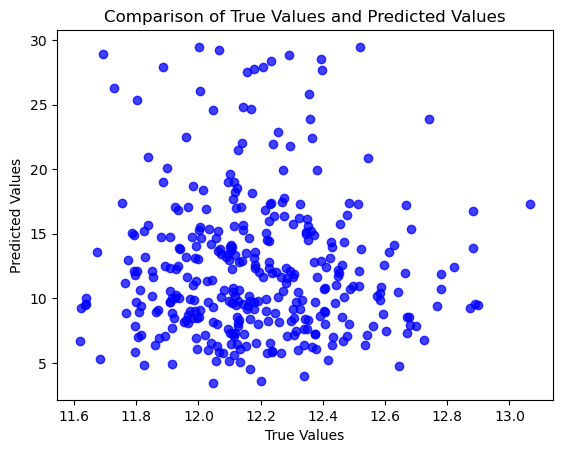

In [120]:
# creating scatter plot of actual vs predicted values
plt.scatter(Y_pred, Y_test, alpha=0.75, color='b')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of True Values and Predicted Values')

In [121]:
# displaying coeffient list
coef = model.coef_.transpose()
feat = list(X_train.columns)
pd.DataFrame(zip(feat, coef), columns=['Feature', 'Coefficient'])

,Feature,Coefficient
0,CourseCategory,-1.156478e+00
1,InstRating,-1.865875e-07
2,Student,3.351886e-05
3,Duration,-7.250054e-07
4,NumberRatings,-2.830889e-03
5,Enrollment,-7.696693e-03
6,LastUpdated,8.824170e-03


### Readings

### 8. Out of Sample Predictions

In [122]:
SyntheticData = pd.DataFrame({'cbrt_Enrollment':[31,25],'cbrt_Review':[44,11],'cbrt_Student':[64,31],'InstRating':[4.4,4.2],'Duration':[4.3,4.2],'Fee':[1,0],'Student':[4.2,4.6]})


In [123]:
# Synthetic Dataset
synthetic_data = pd.DataFrame({'cbrt_Enrollment':[31,25],'cbrt_Review':[44,11],'cbrt_Student':[64,31],'InstRating':[4.4,4.2],'Duration':[4.3,4.2],'Fee':[1,0],'Student':[4.2,4.6]})

# Feature Scaling
scaler = MinMaxScaler()
synthetic_data_scaled = scaler.fit_transform(synthetic_data)

# Perform out-of-sample prediction
predicted_ratings = model.predict(synthetic_data_scaled)
predicted_ratings = np.expm1(predicted_ratings)  # Convert back from log1p transformation if applicable

# Print the predicted ratings
print("Predicted Ratings:")
for i, rating in enumerate(predicted_ratings):
    print(f"Sample {i+1}: {rating}")


Predicted Ratings:
Sample 1: 8260898.1449744105
Sample 2: 26771291.141832605
